In [1]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass  # To get the password without showing the input
password = getpass.getpass()

········


In [2]:
#making connection to mySQL
connection_string = 'mysql+pymysql://root:' + password + '@localhost/bank'
engine = create_engine(connection_string)

In [3]:
import numpy  as np

In [4]:
# get data from mySQl

query = '''SELECT * FROM sakila.film
LEFT JOIN sakila.inventory USING (film_id)
LEFT JOIN sakila.rental fa USING (inventory_id)
LEFT JOIN sakila.film_category fc USING (film_id)
LEFT JOIN sakila.category c USING (category_id)
LEFT JOIN sakila.payment p USING (rental_id);'''
data = pd.read_sql_query(query, engine)
print(data.shape)
data.head()

(16088, 32)


,rental_id,category_id,film_id,inventory_id,title,description,release_year,language_id,original_language_id,rental_duration,...,last_update,last_update,name,last_update,payment_id,customer_id,staff_id,amount,payment_date,last_update
0,4863.0,6,1,1.0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,2006-02-15 21:30:53,2006-02-15 05:07:09,Documentary,2006-02-15 04:46:27,11630.0,431.0,1.0,0.99,2005-07-08 19:03:15,2006-02-15 22:18:35
1,11433.0,6,1,1.0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,2006-02-15 21:30:53,2006-02-15 05:07:09,Documentary,2006-02-15 04:46:27,13956.0,518.0,2.0,3.99,2005-08-02 20:13:10,2006-02-15 22:20:51
2,14714.0,6,1,1.0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,2006-02-15 21:30:53,2006-02-15 05:07:09,Documentary,2006-02-15 04:46:27,7578.0,279.0,1.0,3.99,2005-08-21 21:27:43,2006-02-15 22:15:20
3,16050.0,6,1,1.0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,2022-09-19 18:36:54,2006-02-15 05:07:09,Documentary,2006-02-15 04:46:27,NaN,NaN,NaN,NaN,NaT,NaT
4,972.0,6,1,2.0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,2006-02-15 21:30:53,2006-02-15 05:07:09,Documentary,2006-02-15 04:46:27,11124.0,411.0,2.0,1.99,2005-05-30 20:21:07,2006-02-15 22:18:08


In [5]:
#reformatting return_date and rental_date
data['return_date'] = pd.to_datetime(data['return_date']).dt.date
data['rental_date'] = pd.to_datetime(data['rental_date']).dt.date
#creating new variable duration_of_rental and reformatting
data['duration_of_rental'] = (data['return_date'] - data['rental_date'])
#creating a variable for the target
data['may_target'] = pd.DatetimeIndex(data['rental_date']).month
 
print(data.shape)
data.head() 

(16088, 34)


,rental_id,category_id,film_id,inventory_id,title,description,release_year,language_id,original_language_id,rental_duration,...,name,last_update,payment_id,customer_id,staff_id,amount,payment_date,last_update,duration_of_rental,may_target
0,4863.0,6,1,1.0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,Documentary,2006-02-15 04:46:27,11630.0,431.0,1.0,0.99,2005-07-08 19:03:15,2006-02-15 22:18:35,3 days,7.0
1,11433.0,6,1,1.0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,Documentary,2006-02-15 04:46:27,13956.0,518.0,2.0,3.99,2005-08-02 20:13:10,2006-02-15 22:20:51,9 days,8.0
2,14714.0,6,1,1.0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,Documentary,2006-02-15 04:46:27,7578.0,279.0,1.0,3.99,2005-08-21 21:27:43,2006-02-15 22:15:20,9 days,8.0
3,16050.0,6,1,1.0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,Documentary,2006-02-15 04:46:27,NaN,NaN,NaN,NaN,NaT,NaT,NaT,9.0
4,972.0,6,1,2.0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,Documentary,2006-02-15 04:46:27,11124.0,411.0,2.0,1.99,2005-05-30 20:21:07,2006-02-15 22:18:08,7 days,5.0


In [6]:
 #function for making boolean variable
def boolean(x):
    if x==5:
        return 1
    else:
        return 0
    
    
data['may_target'] = list(map(boolean, data['may_target']))   

In [7]:
print(data.shape)
data.head() 

(16088, 34)


,rental_id,category_id,film_id,inventory_id,title,description,release_year,language_id,original_language_id,rental_duration,...,name,last_update,payment_id,customer_id,staff_id,amount,payment_date,last_update,duration_of_rental,may_target
0,4863.0,6,1,1.0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,Documentary,2006-02-15 04:46:27,11630.0,431.0,1.0,0.99,2005-07-08 19:03:15,2006-02-15 22:18:35,3 days,0
1,11433.0,6,1,1.0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,Documentary,2006-02-15 04:46:27,13956.0,518.0,2.0,3.99,2005-08-02 20:13:10,2006-02-15 22:20:51,9 days,0
2,14714.0,6,1,1.0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,Documentary,2006-02-15 04:46:27,7578.0,279.0,1.0,3.99,2005-08-21 21:27:43,2006-02-15 22:15:20,9 days,0
3,16050.0,6,1,1.0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,Documentary,2006-02-15 04:46:27,NaN,NaN,NaN,NaN,NaT,NaT,NaT,0
4,972.0,6,1,2.0,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,...,Documentary,2006-02-15 04:46:27,11124.0,411.0,2.0,1.99,2005-05-30 20:21:07,2006-02-15 22:18:08,7 days,1


In [8]:
#formating somenominal values to object
data['may_target'] = data['may_target'].values.astype(str)
data['film_id'] = data['film_id'].values.astype(str)
data['store_id'] = data['store_id'].values.astype(str)



In [9]:
 #dropping unrelated variables
data= data.drop(['category_id', 'rental_duration', 'rental_id', 'inventory_id', 'description', 'release_year', 'language_id', 'original_language_id', 'last_update',
                     'last_update', 'rental_date', 'customer_id', 'return_date', 'staff_id', 'replacement_cost', 'payment_id', 'payment_date'], axis=1)

In [10]:
print(data.shape)
data.head() 

(16088, 11)


,film_id,title,rental_rate,length,rating,special_features,store_id,name,amount,duration_of_rental,may_target
0,1,ACADEMY DINOSAUR,0.99,86,PG,"Deleted Scenes,Behind the Scenes",1.0,Documentary,0.99,3 days,0
1,1,ACADEMY DINOSAUR,0.99,86,PG,"Deleted Scenes,Behind the Scenes",1.0,Documentary,3.99,9 days,0
2,1,ACADEMY DINOSAUR,0.99,86,PG,"Deleted Scenes,Behind the Scenes",1.0,Documentary,3.99,9 days,0
3,1,ACADEMY DINOSAUR,0.99,86,PG,"Deleted Scenes,Behind the Scenes",1.0,Documentary,NaN,NaT,0
4,1,ACADEMY DINOSAUR,0.99,86,PG,"Deleted Scenes,Behind the Scenes",1.0,Documentary,1.99,7 days,1


In [11]:
#changing name of not meaningful varaiable name 
data['category_name'] = data['name']
data= data.drop(['name'], axis=1)
              

In [12]:
print(data.shape)
data.head()  

(16088, 11)


,film_id,title,rental_rate,length,rating,special_features,store_id,amount,duration_of_rental,may_target,category_name
0,1,ACADEMY DINOSAUR,0.99,86,PG,"Deleted Scenes,Behind the Scenes",1.0,0.99,3 days,0,Documentary
1,1,ACADEMY DINOSAUR,0.99,86,PG,"Deleted Scenes,Behind the Scenes",1.0,3.99,9 days,0,Documentary
2,1,ACADEMY DINOSAUR,0.99,86,PG,"Deleted Scenes,Behind the Scenes",1.0,3.99,9 days,0,Documentary
3,1,ACADEMY DINOSAUR,0.99,86,PG,"Deleted Scenes,Behind the Scenes",1.0,NaN,NaT,0,Documentary
4,1,ACADEMY DINOSAUR,0.99,86,PG,"Deleted Scenes,Behind the Scenes",1.0,1.99,7 days,1,Documentary


In [13]:
data.dtypes

film_id                        object
title                          object
rental_rate                   float64
length                          int64
rating                         object
special_features               object
store_id                       object
amount                        float64
duration_of_rental    timedelta64[ns]
may_target                     object
category_name                  object
dtype: object

In [14]:
time_median = data['duration_of_rental'].median()
time_median
data['duration_of_rental'] = data['duration_of_rental'].replace({np.nan: time_median}).dt.days

In [15]:
data.dtypes

film_id                object
title                  object
rental_rate           float64
length                  int64
rating                 object
special_features       object
store_id               object
amount                float64
duration_of_rental      int64
may_target             object
category_name          object
dtype: object

In [16]:
data.isna().sum()
#dealing with NaN values

film_id                0
title                  0
rental_rate            0
length                 0
rating                 0
special_features       0
store_id               0
amount                44
duration_of_rental     0
may_target             0
category_name          0
dtype: int64

In [17]:
#looking at distribution of amount value 
data.value_counts('amount')

amount
4.99     3789
2.99     3542
0.99     2977
5.99     1299
6.99     1119
3.99     1108
7.99      670
1.99      638
8.99      485
9.99      256
10.99     104
0.00       24
11.99      10
3.98        8
5.98        7
7.98        5
8.97        1
9.98        1
1.98        1
dtype: int64

In [18]:
#looking at distribution of amount value 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rental_rate,16088.0,2.942636,1.649907,0.99,0.99,2.99,4.99,4.99
length,16088.0,114.955246,40.099140,46.00,81.00,113.00,148.00,185.00
amount,16044.0,4.201356,2.362961,0.00,2.99,3.99,4.99,11.99
duration_of_rental,16088.0,5.024863,2.593344,0.00,3.00,5.00,7.00,10.00


In [19]:
 #filling NaN value in amount variable with  it's median 
data['amount'] = data['amount'].fillna(data['amount'].median())


In [20]:
data.head()

,film_id,title,rental_rate,length,rating,special_features,store_id,amount,duration_of_rental,may_target,category_name
0,1,ACADEMY DINOSAUR,0.99,86,PG,"Deleted Scenes,Behind the Scenes",1.0,0.99,3,0,Documentary
1,1,ACADEMY DINOSAUR,0.99,86,PG,"Deleted Scenes,Behind the Scenes",1.0,3.99,9,0,Documentary
2,1,ACADEMY DINOSAUR,0.99,86,PG,"Deleted Scenes,Behind the Scenes",1.0,3.99,9,0,Documentary
3,1,ACADEMY DINOSAUR,0.99,86,PG,"Deleted Scenes,Behind the Scenes",1.0,3.99,5,0,Documentary
4,1,ACADEMY DINOSAUR,0.99,86,PG,"Deleted Scenes,Behind the Scenes",1.0,1.99,7,1,Documentary


In [21]:
#checking NaN value again
data.isna().sum()


film_id               0
title                 0
rental_rate           0
length                0
rating                0
special_features      0
store_id              0
amount                0
duration_of_rental    0
may_target            0
category_name         0
dtype: int64

In [22]:
#categorizing the special_features value
data['special_features'].value_counts()

Trailers,Commentaries,Behind the Scenes                   1323
Trailers                                                  1152
Trailers,Commentaries                                     1145
Trailers,Behind the Scenes                                1142
Behind the Scenes                                         1116
Commentaries,Deleted Scenes,Behind the Scenes             1113
Commentaries                                              1102
Commentaries,Behind the Scenes                            1093
Trailers,Deleted Scenes                                   1066
Deleted Scenes,Behind the Scenes                          1054
Deleted Scenes                                            1041
Commentaries,Deleted Scenes                               1023
Trailers,Commentaries,Deleted Scenes,Behind the Scenes    1009
Trailers,Commentaries,Deleted Scenes                       926
Trailers,Deleted Scenes,Behind the Scenes                  783
Name: special_features, dtype: int64

In [23]:
def cleanSpecialFeatures(x):
  
    if 'Trailers,Commentaries,Behind the Scenes' in x:
        return "Trailers"
    elif 'Trailers' in x:
        return "Trailers"
    elif 'Trailers,Commentaries' in x:
        return  "Trailers" 
    elif 'Trailers,Behind the Scenes' in x:
        return  "Trailers"
    elif 'Trailers,Commentaries,Deleted Scenes,Behind the Scenes' in x:
        return  "Trailers"
    elif 'Trailers,Commentaries,Deleted Scenes' in x:
        return  "Trailers"
    elif 'Trailers,Deleted Scenes,Behind the Scenes' in x:
        return  "Trailers"
    elif 'Trailers,Deleted Scenes' in x:
        return  "Trailers"
    elif 'Commentaries,Deleted Scenes,Behind the Scenes' in x:
        return  "Commentaries"
    elif 'Commentaries' in x:
        return  "Commentaries"
    elif 'Commentaries,Behind the Scenes' in x:
        return  "Commentaries"
    elif 'Commentaries,Deleted Scenes' in x:
        return  "Commentaries"
    elif 'Deleted Scenes,Behind the Scenes' in x:
        return  "Deleted Scenes"
    elif 'Deleted Scenes' in x:
        return  "Deleted Scenes"
    elif 'Behind the Scenes' in x:
        return  "Behind the Scenes"
    else:
        return x  

data['special_features'] = list(map(cleanSpecialFeatures, data['special_features']))

In [24]:
 data['special_features'].value_counts()

Trailers             8546
Commentaries         4331
Deleted Scenes       2095
Behind the Scenes    1116
Name: special_features, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='special_features', ylabel='count'>

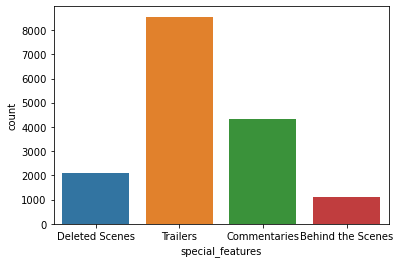

In [26]:
sns.countplot(x=data.special_features)


<AxesSubplot:xlabel='category_name', ylabel='count'>

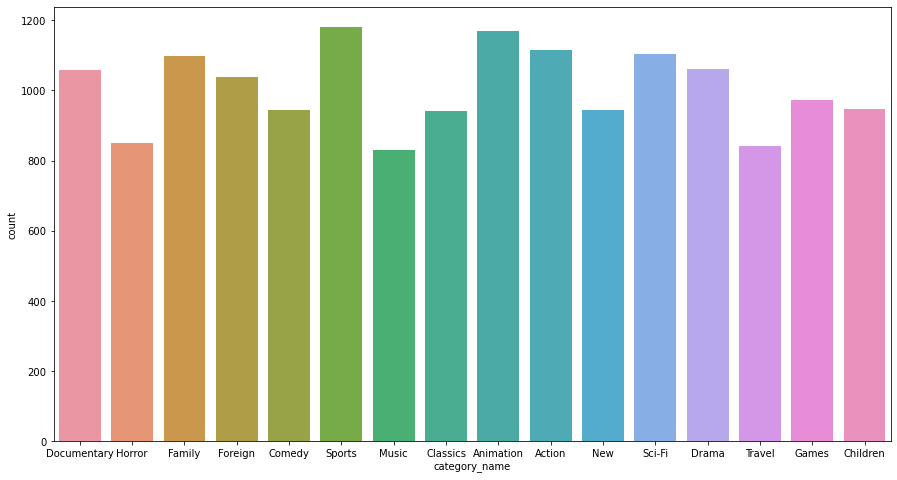

In [27]:
plt.figure(figsize = (15,8))
sns.countplot(x=data.category_name)

<AxesSubplot:xlabel='rating', ylabel='count'>

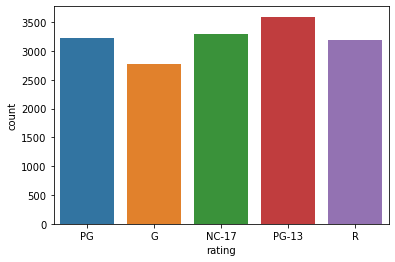

In [28]:
sns.countplot(x=data.rating)

<AxesSubplot:xlabel='may_target', ylabel='count'>

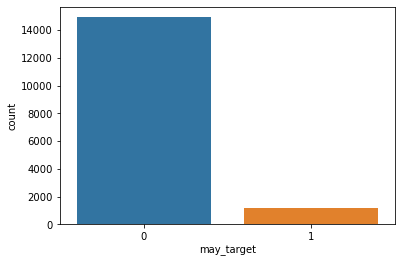

In [29]:
sns.countplot(x=data.may_target)

<AxesSubplot:xlabel='store_id', ylabel='count'>

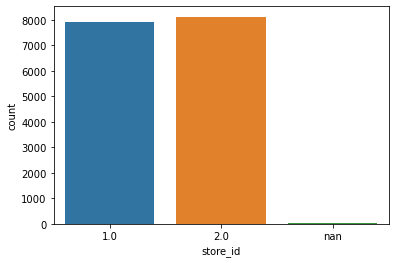

In [30]:
sns.countplot(x=data.store_id)

In [31]:
data['store_id'].value_counts()

2.0    8122
1.0    7924
nan      42
Name: store_id, dtype: int64

In [32]:
def cleanStore_id(x):
    
    if '1' in x:
        return "1"
    elif '2' in x:
        return "2"
    else:
        return 'unknown'
    
    

data['store_id'] = list(map(cleanStore_id, data['store_id']))

In [33]:
data['store_id'].value_counts() 


2          8122
1          7924
unknown      42
Name: store_id, dtype: int64

<AxesSubplot:xlabel='may_target', ylabel='count'>

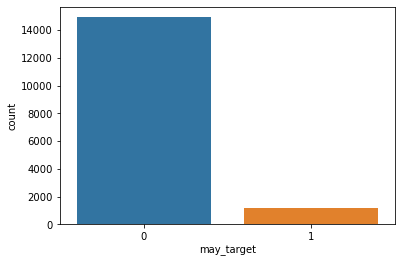

In [34]:
sns.countplot(x=data.may_target)   

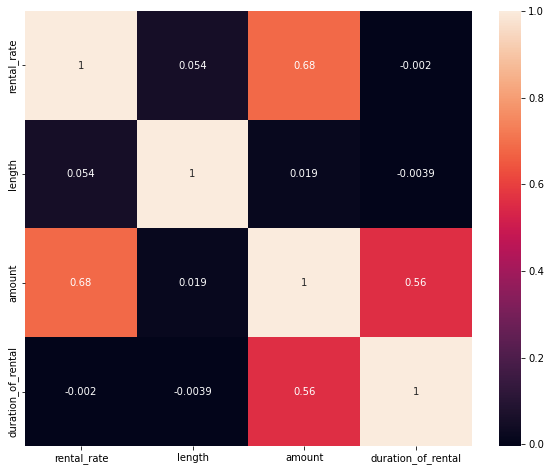

In [35]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

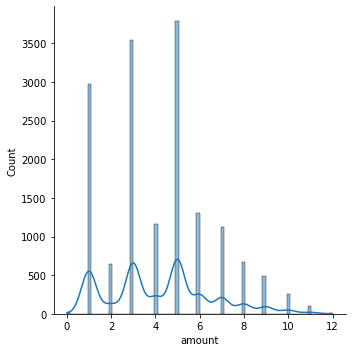

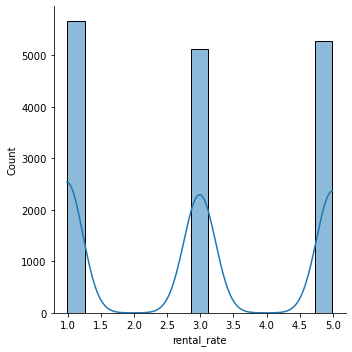

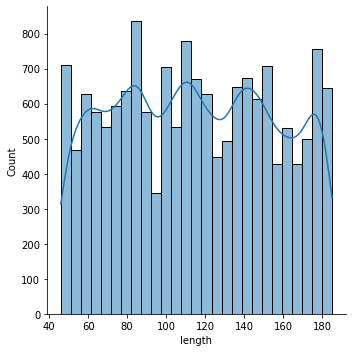

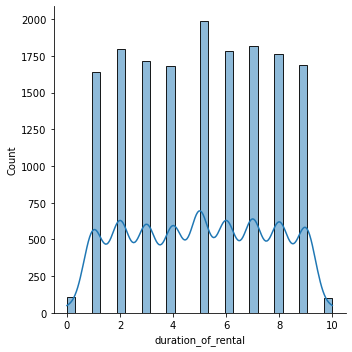

In [36]:
# look at the scale and distribution of values
sns.displot(data['amount'], kde=True)
plt.show()

sns.displot(data['rental_rate'], kde=True)
plt.show()

sns.displot(data['length'], kde=True)
plt.show()

sns.displot(data['duration_of_rental'], kde=True)
plt.show()

In [37]:
data.describe()

,rental_rate,length,amount,duration_of_rental
count,16088.000000,16088.000000,16088.000000,16088.000000
mean,2.942636,114.955246,4.200778,5.024863
std,1.649907,40.099140,2.359753,2.593344
min,0.990000,46.000000,0.000000,0.000000
25%,0.990000,81.000000,2.990000,3.000000
50%,2.990000,113.000000,3.990000,5.000000
75%,4.990000,148.000000,4.990000,7.000000
max,4.990000,185.000000,11.990000,10.000000


In [38]:
# Need to X-y-split AND train-test-split BEFORE I apply transformations, 
# then train transformation on training set only
y = data['may_target']
X = data.drop('may_target', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [39]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df  = pd.DataFrame(X_test,  columns=X.columns)

X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num  = X_test_df.select_dtypes(include = np.number)
X_train_cat = X_train_df.select_dtypes(include = object)
X_test_cat  = X_test_df.select_dtypes(include = object)



 

In [44]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)
X_train_norm.columns = X_train_num.columns
X_train_norm.head()

,rental_rate,length,amount,duration_of_rental
0,0.5,0.388489,0.249374,0.4
1,0.0,0.330935,0.165972,0.6
2,0.0,0.100719,0.082569,0.1
3,0.0,0.323741,0.082569,0.1
4,0.5,0.604317,0.332777,0.7


In [41]:

X_train_cat = pd.get_dummies(X_train_cat, 
                             columns=['rating', 'special_features', 'store_id', 'category_name'],
                             drop_first=True)

X_train_cat= X_train_cat.drop(['title'], axis=1)
X_train_cat.head() 

,film_id,rating_NC-17,rating_PG,rating_PG-13,rating_R,special_features_Commentaries,special_features_Deleted Scenes,special_features_Trailers,store_id_2,store_id_unknown,...,category_name_Drama,category_name_Family,category_name_Foreign,category_name_Games,category_name_Horror,category_name_Music,category_name_New,category_name_Sci-Fi,category_name_Sports,category_name_Travel
3708,236,0,0,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4445,282,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
11900,743,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5057,314,0,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
71,5,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
# build X_train and y_train
# remember: y = data['status'], y_train selected in train_test_split
X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

# X_train_transformed = pd.concat([X_train_scaled, onehot_encoded], axis=1)


In [46]:
 from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train)



C:\IronHack\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
classification = LogisticRegression(random_state=0, solver='newton-cg',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [62]:
# for test data numericals

# Scaling data
# we use the transformer that was trained on the training data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [63]:
#for test data categoricals
X_test_cat= X_test_cat.drop(['title'], axis=1)
X_train_cat.head() 




KeyError: "['title'] not found in axis"

In [64]:
X_test_cat = pd.get_dummies(X_test_cat, 
                           columns=['rating', 'special_features', 'store_id', 'category_name'],
                             drop_first=True)
# verify that dummies columns are in the same order and that the same column was dropped
display(list(zip(list(X_train_cat.columns),list(X_test_cat.columns))))
# not needed if you treat each dataframe with one_hot_encoder and save the encode (and the column names)

X_test_cat.head()

KeyError: "None of [Index(['rating', 'special_features', 'store_id', 'category_name'], dtype='object')] are in the [columns]"

In [65]:
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

In [66]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

0.9331883157240523

In [67]:
print(y_test.value_counts())

0    3003
1     215
Name: may_target, dtype: int64


In [68]:
pd.Series(predictions).value_counts()

0    3218
dtype: int64

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[3003,    0],
       [ 215,    0]], dtype=int64)

In [76]:
#KNN classifier: look at nearest neighbours and use the majority to determine class
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform')
clf.fit(X_train_transformed, y_train)
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)

0.9328775637041641

In [72]:
confusion_matrix(y_test, predictions_clf)

array([[3002,    1],
       [ 215,    0]], dtype=int64)

In [73]:
pd.Series(y_test).value_counts()

0    3003
1     215
Name: may_target, dtype: int64

In [81]:
3003/(3003+215)

0.9331883157240523

In [80]:
# classification.score == accuracy of prediction
(3002+0)/len(predictions)

0.9328775637041641

In [74]:
pd.Series(predictions_clf).value_counts()

0    3217
1       1
dtype: int64

In [ ]:
# Classification score  in our model is 0.93 nevertheless the prediction accuracy for a predictor that always classfying as “not rented in may” would be almost the same
# it might be justified by unbalenced data in target values.
